In [97]:
import networkx as nx
import math
import queue
import pandas as pd
# import matplotlib as mt
import matplotlib.pyplot as plt
def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        distance=[]
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            minn = [min_dic]
            return current_path+ minn   # Goal found

        visited.add(current_node)
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]  # Include neighbor in the current path
               
                g = 0  # Reset g here before calculating its value
               
               
                
                for i in range(len(new_path) - 1):
                    g += graph[new_path[i]][new_path[i + 1]]['Distance']  # Recalculate g for the new path
                    distance.append(g)
                pri_queue.put((g + heuristic[neighbor], new_path))
                min_dic = min(distance)
                
    return []  # Goal not found






In [98]:
# Example graph

ad=pd.read_csv(r"/home/noone/Documents/jupyternotebook/notebooks/lab5Task(A*)/indian-cities-dataset.csv")

G = nx.Graph()
G = nx.from_pandas_edgelist(ad, 'Origin', 'Destination',['Distance'])

start_node=str(input("enter the starting node ")).capitalize()
goal_node=str(input("please enter the goal node ")).capitalize()
# print(G)

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = astar(G, start_node, goal_node, heuristic)

distance = path.pop()
if path:
    print("Path from {} to {} found: {} and total distance covered: {}" .format(start_node, goal_node, ' -> '.join(path), distance))
else:
    print("No path found from {} to {}".format(start_node, goal_node))

enter the starting node  Delhi
please enter the goal node  Agra


Path from Delhi to Agra found: Delhi -> Agra and total distance covered: 243


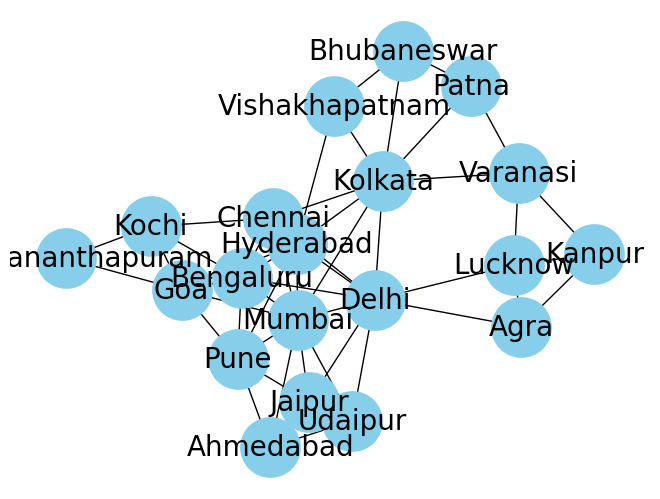

In [103]:
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=5, font_size=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
graph=nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
